In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("fashion_train.csv")
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
y = data["y"]
X = data.drop(columns=["y"])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)

In [8]:
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
X_test_scaled

array([[[[-0.03537746],
         [-0.06178306],
         [-0.07711209],
         ...,
         [-0.069874  ],
         [-0.06578111],
         [ 0.        ]],

        [[-0.04317329],
         [-0.06265859],
         [-0.0764941 ],
         ...,
         [-0.11595388],
         [-0.06238272],
         [-0.05893694]],

        [[-0.04671371],
         [-0.06547403],
         [-0.05988506],
         ...,
         [-0.13090632],
         [-0.07924314],
         [-0.06320973]],

        ...,

        [[-0.10393169],
         [-0.16762676],
         [-0.2357916 ],
         ...,
         [-0.29827234],
         [-0.21360405],
         [-0.11061922]],

        [[-0.07188932],
         [-0.11872077],
         [-0.18964214],
         ...,
         [-0.26835286],
         [-0.18154182],
         [-0.09129788]],

        [[-0.04856429],
         [-0.0809901 ],
         [-0.1207923 ],
         ...,
         [-0.19180113],
         [-0.10965698],
         [-0.03907323]]],


       [[[-0.03537746],


In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [75]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ["accuracy"])

In [77]:
history = model.fit(X_train_scaled,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
23/23 [==============================] - 1s 18ms/step - loss: 1.6235 - accuracy: 0.4417 - val_loss: 0.9699 - val_accuracy: 0.6625
Epoch 2/10
23/23 [==============================] - 0s 13ms/step - loss: 0.9778 - accuracy: 0.6542 - val_loss: 0.7203 - val_accuracy: 0.7125
Epoch 3/10
23/23 [==============================] - 0s 14ms/step - loss: 0.7247 - accuracy: 0.7431 - val_loss: 0.6045 - val_accuracy: 0.8000
Epoch 4/10
23/23 [==============================] - 0s 13ms/step - loss: 0.6201 - accuracy: 0.7653 - val_loss: 0.5523 - val_accuracy: 0.7500
Epoch 5/10
23/23 [==============================] - 0s 14ms/step - loss: 0.5624 - accuracy: 0.7917 - val_loss: 0.5275 - val_accuracy: 0.7875
Epoch 6/10
23/23 [==============================] - 0s 14ms/step - loss: 0.4771 - accuracy: 0.8236 - val_loss: 0.5531 - val_accuracy: 0.8125
Epoch 7/10
23/23 [==============================] - 0s 15ms/step - loss: 0.4550 - accuracy: 0.8319 - val_loss: 0.4921 - val_accuracy: 0.8250
Epoch 8/10
23

In [78]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.7950


[0.584009051322937, 0.7950000166893005]

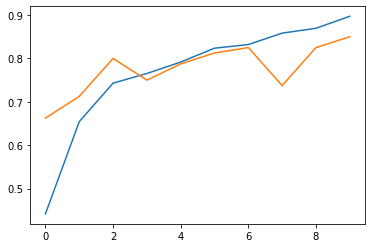

In [79]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

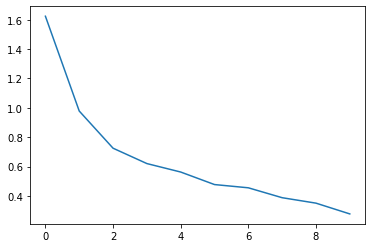

In [80]:
plt.plot(history.history["loss"])

In [81]:
X_test_scaled[0]

array([[[-3.53774569e-02],
        [-6.17830623e-02],
        [-7.71120904e-02],
        [-1.07116325e-01],
        [-7.01400275e-02],
        [-7.68236456e-02],
        [-1.14280347e-01],
        [ 3.32891740e+00],
        [ 3.33143939e+00],
        [ 5.45003448e-01],
        [ 1.24399167e-01],
        [-3.36193364e-01],
        [-5.89580430e-01],
        [-6.44555653e-01],
        [-5.78247369e-01],
        [-7.88308848e-01],
        [-5.43594179e-01],
        [-2.92184084e-01],
        [ 7.69407340e-02],
        [ 4.65018175e-01],
        [ 3.58609711e+00],
        [-1.41666708e-01],
        [-1.16938359e-01],
        [-9.05262750e-02],
        [-6.77985509e-02],
        [-6.98740007e-02],
        [-6.57811084e-02],
        [ 0.00000000e+00]],

       [[-4.31732892e-02],
        [-6.26585866e-02],
        [-7.64940964e-02],
        [-5.55484835e-02],
        [-8.39599737e-02],
        [-1.52887899e-01],
        [-2.78497182e-01],
        [ 1.00716632e+00],
        [ 1.54732717e+00],

In [94]:
y_test.iloc[0]

3

In [93]:
model.predict(X_test_scaled[0].reshape(-1,28,28,1)).argmax()

3